In [1]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
activation = [
    'relu',
    'sigmoid',
    'linear',
    'softmax',
]

In [3]:
class ActivationFunction:
    def __init__(self, activation_function):
        if activation_function == 'sigmoid':
            self.function = lambda net: 1 / (1 + np.exp(-net))
        elif activation_function == 'relu':
            self.function = lambda net: np.maximum(0, net)
        elif activation_function == 'linear':
            self.function = lambda net: net
        elif activation_function == 'softmax':
            self.function = lambda net: np.exp(net) / np.sum(np.exp(net))

    def get_activation_function(self):
        return self.function

In [4]:
class Layer:
    def __init__(self, neuron: int, activation_function: str, weights: np.array, bias: np.array):
        self.neuron = neuron
        self.weights = weights
        self.bias = bias
        if activation_function not in activation:
            raise Exception('Invalid activation function')
        else:
            self.activation_function = activation_function
            self.function = ActivationFunction(activation_function).get_activation_function()

    def forward(self, input: np.array):
        output = self.function(np.dot(input, self.weights) + self.bias)
        return np.round(output, decimals=7)

In [5]:
class FFNN:
    def __init__(self):
        self.layers = []
        self.node_bobots = []

    def add_layer(self, layer: Layer):
        self.layers.append(layer)

    def forward(self, input: np.array):
        output = input

        self.node_bobots.append(output[0])
        for layer in self.layers:
            output = layer.forward(output)
            temp_nodes = output[0].tolist()
            self.node_bobots.append(temp_nodes)
        return output

In [6]:
class NeuralNetworkGraph:
    def __init__(self):
        self.graphs = nx.DiGraph()
        self.node_labels = {}

    def add_nodes_layer(self, nodes, layer):
        self.graphs.add_nodes_from(nodes, layer=layer)

    def add_edge(self, node_source, node_goal):
        self.graphs.add_edge(node_source, node_goal)

    def add_all_nodes(self, node_bobots):

        # Add input bias label
        self.node_labels[0] = "Input"+str(0)+": "+str(1)

        node_number = 1

        self.add_nodes_layer([i for i in range(len(node_bobots[0])+1)], 0)

        # Add input label
        for i, node_value in enumerate(node_bobots[0]):
            self.node_labels[node_number] = "Input"+str(i+1)+": "+str(node_value)
            node_number += 1

        # Add nodes for each layer with the subset key
        for i in range(1, len(node_bobots)-1):
            self.node_labels[node_number] = "H"+str(i)+str(0)+": "+str(1)
            self.add_nodes_layer([node_number+j for j in range(len(node_bobots[i])+1)], i)
            node_number += 1
            for j in range(len(node_bobots[i])):
                self.node_labels[node_number] = "H"+str(i)+str(j+1)+": "+str(node_bobots[i][j])
                node_number += 1

        self.add_nodes_layer([node_number+j for j in range(len(node_bobots[-1]))], len(node_bobots))

        # Add output nodes
        for i, node_value in enumerate(node_bobots[-1]):
            self.node_labels[node_number] = "Output"+str(i+1)+": "+str(node_value)
            node_number += 1

    def add_all_edges(self, node_bobots):
        number_of_prev_neuron = 0
        curr_number_neuron = 0

        # Add edge for each node of input layer and hidden layer
        for layer_number in range(len(node_bobots)-2):
            curr_number_neuron += len(node_bobots[layer_number])+1
            for i in range(len(node_bobots[layer_number])+1):
                for j in range(len(node_bobots[layer_number+1])):
                    self.add_edge(number_of_prev_neuron, curr_number_neuron+j+1)
                number_of_prev_neuron += 1

        # Add edge for each node on output layer
        curr_number_neuron += len(node_bobots[-2])+1
        for i in range(len(node_bobots[-2])+1):
            for j in range(len(node_bobots[-1])):
                self.add_edge(number_of_prev_neuron, curr_number_neuron+j)
            number_of_prev_neuron += 1
        
        

In [7]:
def saveModel(weights, layers):
    case_dict = {'case': {'weights': weights, 'model': {'layers': layers}}}
    with open("../../Bagian-A/model/latest_weights_and_structures.json", 'w') as outfile:
        json.dump(case_dict, outfile, indent=4)

In [8]:
### WITHOUT LOADING SAVED MODEL
model = open(f'../../Bagian-A/test/multilayer.json', 'r')
model = json.load(model)

layers = model['case']['model']['layers']
weights = model['case']['weights']

# for saving model
layers_dict = []
weights_dict = []

ffnn = FFNN()
for i in range (len(layers)):
    layer = layers[i]
    weight = weights[i]

    # add the layers and weights
    layers_dict.append(layer)
    weights_dict.append(weight)

    ffnn.add_layer(Layer(layer["number_of_neurons"], layer["activation_function"], np.array(weight[1:]), np.array(weight[0])))

saveModel(weights_dict, layers_dict) # save the model

input = model["case"]["input"]

output = ffnn.forward(input).tolist()
expected_output = model['expect']['output']

print("Node values: ", ffnn.node_bobots)

print(f'output: {output}')
print(f'expected output: {expected_output}')

Node values:  [[-1.0, 0.5, 0.8], [2.09, 1.22, 0.25, 0.0], [0.168, 1.708, 0.556], [1.13, 0.2156], [0.4846748]]
output: [[0.4846748]]
expected output: [[0.4846748]]


In [9]:
### WITH LOADING SAVED MODEL
model = open(f'../../Bagian-A/test/multilayer.json', 'r')
model = json.load(model)

# loading the saved models (it contains the layers and weights)
savedModel = open(f'../../Bagian-A/model/latest_weights_and_structures.json', 'r')
savedModel = json.load(savedModel)

layers = savedModel['case']['model']['layers']
weights = savedModel['case']['weights']

# for saving model
layers_dict = []
weights_dict = []

ffnn = FFNN()
for i in range (len(layers)):
    layer = layers[i]
    weight = weights[i]

    # add the layers and weights
    layers_dict.append(layer)
    weights_dict.append(weight)

    ffnn.add_layer(Layer(layer["number_of_neurons"], layer["activation_function"], np.array(weight[1:]), np.array(weight[0])))

saveModel(weights_dict, layers_dict) # save the model

input = model["case"]["input"]

output = ffnn.forward(input).tolist()
expected_output = model['expect']['output']

print("Node values: ", ffnn.node_bobots)

print(f'output: {output}')
print(f'expected output: {expected_output}')

Node values:  [[-1.0, 0.5, 0.8], [2.09, 1.22, 0.25, 0.0], [0.168, 1.708, 0.556], [1.13, 0.2156], [0.4846748]]
output: [[0.4846748]]
expected output: [[0.4846748]]


Edge labels:  {(0, 5): 0.1, (0, 6): 0.2, (0, 7): 0.3, (0, 8): -1.2, (1, 5): -0.5, (1, 6): 0.6, (1, 7): 0.7, (1, 8): 0.5, (2, 5): 0.9, (2, 6): 1.0, (2, 7): -1.1, (2, 8): -1.0, (3, 5): 1.3, (3, 6): 1.4, (3, 7): 1.5, (3, 8): 0.1, (4, 10): 0.1, (4, 11): 0.1, (4, 12): 0.3, (5, 10): -0.4, (5, 11): 0.5, (5, 12): 0.6, (6, 10): 0.7, (6, 11): 0.4, (6, 12): -0.9, (7, 10): 0.2, (7, 11): 0.3, (7, 12): 0.4, (8, 10): -0.1, (8, 11): 0.2, (8, 12): 0.1, (9, 14): 0.1, (9, 15): 0.2, (10, 14): -0.3, (10, 15): 0.4, (11, 14): 0.6, (11, 15): 0.1, (12, 14): 0.1, (12, 15): -0.4, (13, 16): 0.1, (14, 16): -0.2, (15, 16): 0.3}


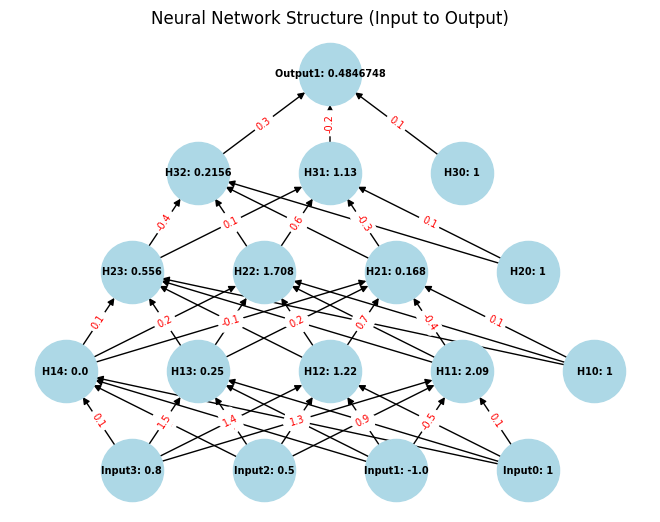

In [10]:
# Initialize a directed graph for visualization
neural_network_graph = NeuralNetworkGraph()

neural_network_graph.add_all_nodes(ffnn.node_bobots)

neural_network_graph.add_all_edges(ffnn.node_bobots)

# Assuming neural_network_graph.graphs is your graph object
neural_network_graphs = neural_network_graph.graphs  # Assuming this is a correct reference

# Add 'layer' attribute to nodes if it's missing
for node in neural_network_graphs.nodes():
    if 'layer' not in neural_network_graphs.nodes[node]:
        neural_network_graphs.nodes[node]['layer'] = 0  # Set a default layer if needed

# Plot the neural network structure
pos = nx.multipartite_layout(neural_network_graphs, subset_key="layer", align='horizontal')
nx.draw(neural_network_graphs, pos, with_labels=True, labels=neural_network_graph.node_labels, node_size=2000, node_color="lightblue", font_size=7, font_weight="bold")

# Add edge labels for better understanding
edge_labels = {}
index = 0
sub_index = 0
sub_sub_index = 0
for u, v in neural_network_graphs.edges():
    edge_labels[(u,v)] = weights[index][sub_index][sub_sub_index]
    if(sub_sub_index+1<len(weights[index][sub_index])):
        sub_sub_index += 1
    else:
        sub_sub_index = 0
        if(sub_index+1<len(weights[index])):
            sub_index += 1
        else:
            sub_index = 0
            index += 1
print("Edge labels: ",edge_labels)
nx.draw_networkx_edge_labels(neural_network_graphs, pos, edge_labels=edge_labels, font_size=7, font_color='red')

plt.title("Neural Network Structure (Input to Output)")
plt.axis('off')
plt.show()